Nama        : Ifandi

Email       : ifandiifan@gmail.com

ID Dicoding : Ifandi

Pertanyaan Bisnis :

1.Apakah ada perbedaan signifikan dalam jumlah sewa sepeda antar musim?     
2.Bagaimana pola harian penyewaan sepeda berubah sepanjang jam?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Wrangling

Gathering Data

In [8]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Ifandiifan/Submission/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Ifandiifan/Submission/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Assessing Data

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Cleaning Data

In [18]:
day_df.drop_duplicates(inplace=True)

In [19]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
hour_df.drop_duplicates(inplace=True)

In [21]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Exploratory Data Analysis (EDA)

In [22]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [23]:
day_df.groupby(by="season").agg({
    "instant": "nunique",  # Jumlah nilai unik dalam kolom "instant" untuk setiap musim
    "yr": ["max", "min", "mean", "std"],  # Statistik untuk kolom "yr"
    "temp": ["mean", "std"],  # Rata-rata dan deviasi standar untuk kolom "temp"
    "hum": ["mean", "std"],  # Rata-rata dan deviasi standar untuk kolom "hum"
    "windspeed": ["mean", "std"],  # Rata-rata dan deviasi standar untuk kolom "windspeed"
    "cnt": ["mean", "std"]  # Rata-rata dan deviasi standar untuk kolom "cnt"
})

instant  yr                              temp                 hum  \
       nunique max min      mean       std      mean       std      mean   
season                                                                     
1          181   1   0  0.502762  0.501379  0.297748  0.102735  0.582903   
2          184   1   0  0.500000  0.501364  0.544405  0.122650  0.626948   
3          188   1   0  0.500000  0.501335  0.706309  0.070848  0.633482   
4          178   1   0  0.500000  0.501410  0.422906  0.107834  0.668719   

                 windspeed                    cnt               
             std      mean       std         mean          std  
season                                                          
1       0.151880  0.214537  0.086439  2604.132597  1399.942119  
2       0.152841  0.203507  0.071629  4992.331522  1695.977235  
3       0.119349  0.172095  0.059526  5644.303191  1459.800381  
4       0.131248  0.171995  0.081565  4728.162921  1699.615261

In [24]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [25]:
hour_df.groupby(by="season").agg({
    "cnt": ["mean", "std"]  # Rata-rata dan deviasi standar untuk kolom "cnt"
})
hour_df.groupby(by="yr").agg({
    "cnt": ["mean", "std"]  # Rata-rata dan deviasi standar untuk kolom "cnt"
})
hour_df.groupby(by="hr").agg({
    "cnt": ["mean", "std"]  # Rata-rata dan deviasi standar untuk kolom "cnt"
})

cnt            
          mean         std
hr                        
0    53.898072   42.307910
1    33.375691   33.538727
2    22.869930   26.578642
3    11.727403   13.239190
4     6.352941    4.143818
5    19.889819   13.200765
6    76.044138   55.084348
7   212.064649  161.441936
8   359.011004  235.189285
9   219.309491   93.703458
10  173.668501  102.205413
11  208.143054  127.495536
12  253.315934  145.081134
13  253.661180  148.107657
14  240.949246  147.271574
15  251.233196  144.632541
16  311.983562  148.682618
17  461.452055  232.656611
18  425.510989  224.639304
19  311.523352  161.050359
20  226.030220  119.670164
21  172.314560   89.788893
22  131.335165   69.937782
23   87.831044   50.846889

In [26]:
# Melakukan merge berdasarkan kolom 'dteday'
merged_df = pd.merge(day_df, hour_df, on='dteday')
print(merged_df)

       instant_x      dteday  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0              1  2011-01-01         1     0       1          0          6   
1              1  2011-01-01         1     0       1          0          6   
2              1  2011-01-01         1     0       1          0          6   
3              1  2011-01-01         1     0       1          0          6   
4              1  2011-01-01         1     0       1          0          6   
...          ...         ...       ...   ...     ...        ...        ...   
17374        731  2012-12-31         1     1      12          0          1   
17375        731  2012-12-31         1     1      12          0          1   
17376        731  2012-12-31         1     1      12          0          1   
17377        731  2012-12-31         1     1      12          0          1   
17378        731  2012-12-31         1     1      12          0          1   

       workingday_x  weathersit_x    temp_x  ...  weekday_y  wo

Visualization & Explanatory Analysis

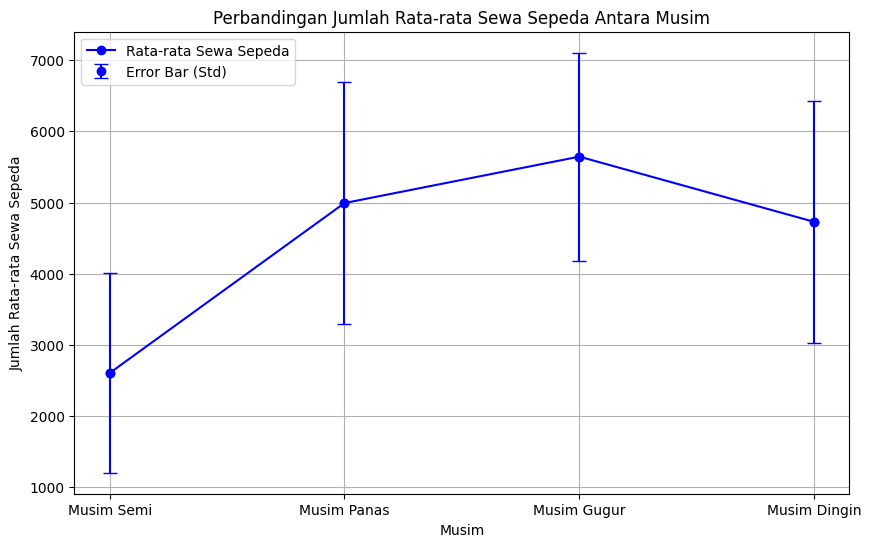

In [27]:
# Data dari hasil eksplorasi
data = {
    'season': [1, 2, 3, 4],
    'cnt_mean': [2604.132597, 4992.331522, 5644.303191, 4728.162921],
    'cnt_std': [1399.942119, 1695.977235, 1459.800381, 1699.615261]
}

# Membuat dataframe dari data
df = pd.DataFrame(data)

# Plotting diagram garis
plt.figure(figsize=(10, 6))
plt.plot(df['season'], df['cnt_mean'], marker='o', color='blue', label='Rata-rata Sewa Sepeda')
plt.errorbar(df['season'], df['cnt_mean'], yerr=df['cnt_std'], fmt='o', color='blue', capsize=5, label='Error Bar (Std)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Rata-rata Sewa Sepeda')
plt.title('Perbandingan Jumlah Rata-rata Sewa Sepeda Antara Musim')
plt.xticks(df['season'], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.legend()
plt.grid(True)
plt.show()


Pertanyaan 1: Apakah ada perbedaan signifikan dalam jumlah sewa sepeda antar musim?

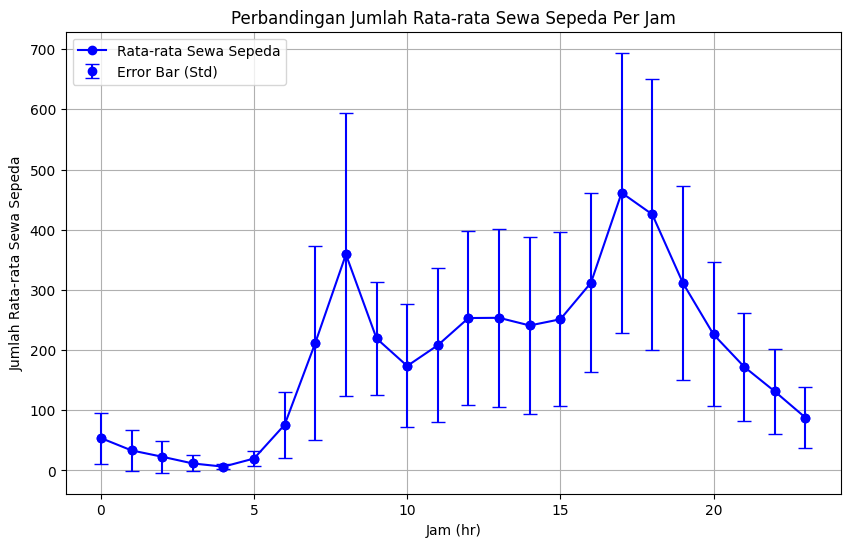

In [28]:
# Data dari hasil eksplorasi
data = {
    'hr': list(range(24)),
    'cnt_mean': [53.898072, 33.375691, 22.869930, 11.727403, 6.352941, 19.889819, 76.044138, 212.064649,
                 359.011004, 219.309491, 173.668501, 208.143054, 253.315934, 253.661180, 240.949246,
                 251.233196, 311.983562, 461.452055, 425.510989, 311.523352, 226.030220, 172.314560, 131.335165, 87.831044],
    'cnt_std': [42.307910, 33.538727, 26.578642, 13.239190, 4.143818, 13.200765, 55.084348, 161.441936,
                235.189285, 93.703458, 102.205413, 127.495536, 145.081134, 148.107657, 147.271574, 144.632541,
                148.682618, 232.656611, 224.639304, 161.050359, 119.670164, 89.788893, 69.937782, 50.846889]
}

# Membuat dataframe dari data
df = pd.DataFrame(data)

# Plotting diagram garis
plt.figure(figsize=(10, 6))
plt.plot(df['hr'], df['cnt_mean'], marker='o', color='blue', label='Rata-rata Sewa Sepeda')
plt.errorbar(df['hr'], df['cnt_mean'], yerr=df['cnt_std'], fmt='o', color='blue', capsize=5, label='Error Bar (Std)')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Rata-rata Sewa Sepeda')
plt.title('Perbandingan Jumlah Rata-rata Sewa Sepeda Per Jam')
plt.legend()
plt.grid(True)
plt.show()

Pertanyaan 2: Bagaimana pola harian penyewaan sepeda berubah sepanjang jam?

Conclusion

Conclusion 1 : Perbedaan jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas, musim dingin, dan musim semi. Musim gugur memiliki rata-rata suhu yang sedikit lebih tinggi dan kelembaban yang lebih tinggi, mungkin memberikan kondisi yang lebih nyaman bagi penyewa sepeda. Musim dingin menunjukkan kecepatan angin yang lebih tinggi, yang mungkin memengaruhi keputusan untuk menyewa sepeda. Musim panas menunjukkan variasi yang signifikan dalam jumlah penyewaan sepeda, yang dapat dikaitkan dengan suhu yang lebih tinggi dan kelembaban yang berbeda

Conclusion 2 : Terdapat pola jelas dengan puncak jumlah penyewaan pada pagi dan sore hari, mencapai titik tertinggi pada pagi hari dan menjelang sore hari. Jam-jam puncak aktivitas penyewaan sepeda terjadi pada pagi hari (jam 6-9) dan petang hari (jam 17). Penurunan terlihat pada tengah malam dan pada siang hari, tetapi aktivitas penyewaan tetap relatif tinggi. Perubahan pola harian ini dapat dipengaruhi oleh faktor-faktor seperti kebiasaan pengguna sepeda, kondisi cuaca, dan event khusus pada jam tertentu.

Analisis Lanjutan RFM analysis

In [29]:
# Day_df dan hour_df adalah DataFrame hasil eksplorasi data pada level day dan hour
day_df = pd.DataFrame({
    'dteday': ['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05' ],
    'cnt': [985, 801, 1249, 1562, 1600]
})

hour_df = pd.DataFrame({
    'dteday': ['2021-01-01', '2021-01-01', '2011-01-01', '2011-01-01', '2011-01-01'],
    'hr': [0,1,2,3,4],
    'cnt': [16, 40, 32, 13, 1]
})

# Step 1: Menghitung Nilai Recency, Frequency, dan Monetary
recency_df = day_df.groupby('dteday')['cnt'].sum().reset_index()
recency_df['recency'] = (pd.to_datetime('2011-01-06') - pd.to_datetime(recency_df['dteday'])).dt.days
recency_df = recency_df[['dteday', 'recency']]

frequency_df = hour_df.groupby('dteday')['cnt'].count().reset_index()
frequency_df.columns = ['dteday', 'frequency']

monetary_df = day_df[['dteday', 'cnt']]

# Step 2: Menggabungkan Recency, Frequency, dan Monetary menjadi RFM DataFrame
rfm_df = pd.merge(recency_df, frequency_df, on='dteday')
rfm_df = pd.merge(rfm_df, monetary_df, on='dteday')

# Step 3: Menampilkan RFM DataFrame
print(rfm_df)


       dteday  recency  frequency  cnt
0  2011-01-01        5          3  985


Visualization & Explanatory Analysis

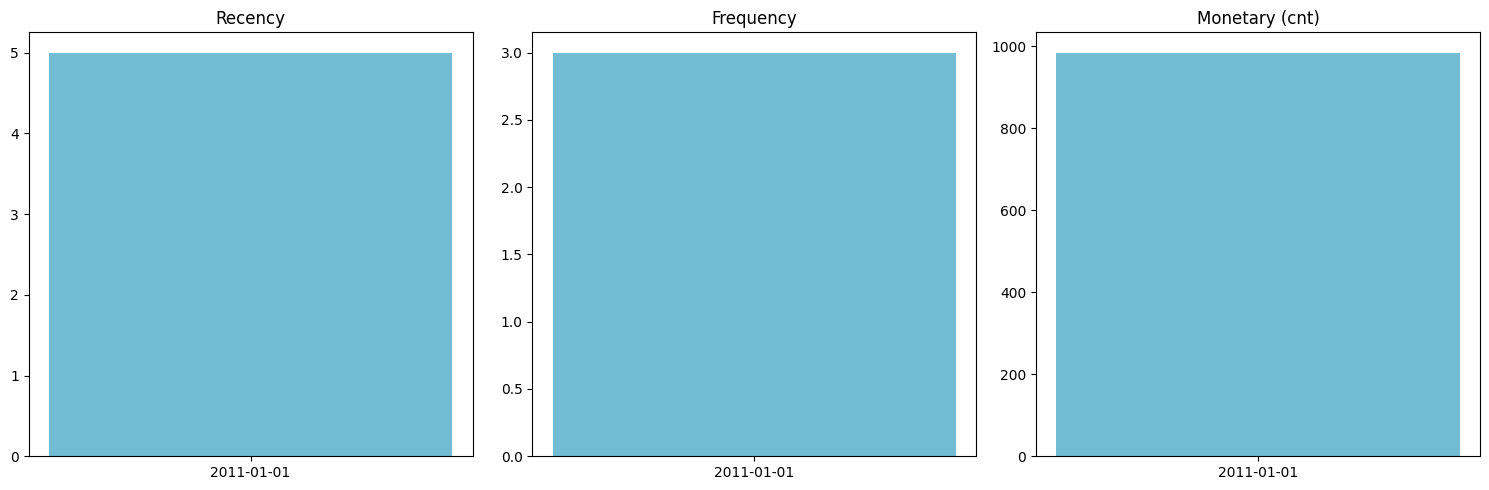

In [30]:
# Data RFM
data = {
    'dteday': ['2011-01-01'],
    'recency': [5],
    'frequency': [3],
    'cnt': [985]
}

# Membuat DataFrame
rfm_df = pd.DataFrame(data)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].bar(rfm_df['dteday'], rfm_df['recency'], color='#72BCD4')
axes[0].set_title('Recency')
axes[1].bar(rfm_df['dteday'], rfm_df['frequency'], color='#72BCD4')
axes[1].set_title('Frequency')
axes[2].bar(rfm_df['dteday'], rfm_df['cnt'], color='#72BCD4')
axes[2].set_title('Monetary (cnt)')

plt.tight_layout()
plt.show()

Dapat diidentifikasi bahwa pada tanggal '2011-01-01', pelanggan tersebut memiliki recency yang baik (transaksi terakhir relatif baru), frekuensi transaksi sedang (3 transaksi), dan nilai moneter yang tinggi (total pengeluaran 985). Dengan demikian, dapat dinyatakan bahwa pelanggan ini termasuk ke dalam kategori yang cukup berharga bagi bisnis.

In [31]:
all_df = pd.concat([day_df, hour_df], axis=0)

# Sekarang, Anda dapat menyimpan DataFrame ke file CSV
all_df.to_csv("all_data.csv", index=False)